In [69]:
# Importing liberaries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
iris =load_iris()

In [70]:
dir(iris) # exploring iris dictionary.

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [71]:
iris.target # iris target.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [72]:
iris.target_names # iris target names.

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [73]:
df = pd.DataFrame(iris.data,columns=iris.feature_names) # Creating dataframe df.
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [74]:
df['target']= iris.target # Creating new variable target.
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [75]:
df['flower_name'] = df.target.apply(lambda x : iris.target_names[x]) # Creating flower_name variable.
                                                                     # Transform according to target_name.
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [76]:
# seperating three different variable df0,df1,df2 according to target type.
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

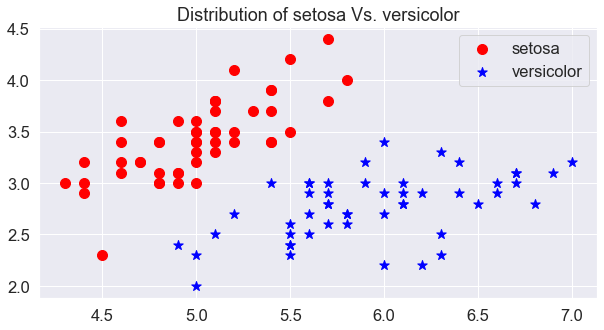

In [97]:
sns.set_style('darkgrid')                          
plt.figure(figsize=(10,5))                         # Taking 'sepal length(cm)' & 'sepal width(cm)'
plt.title('Distribution of setosa Vs. versicolor') # Plotting scatter plot for setosa & versicolor.
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',s=100,label='setosa') # taking only two variable.
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='*',s=100,label='versicolor')
plt.legend()
plt.show()

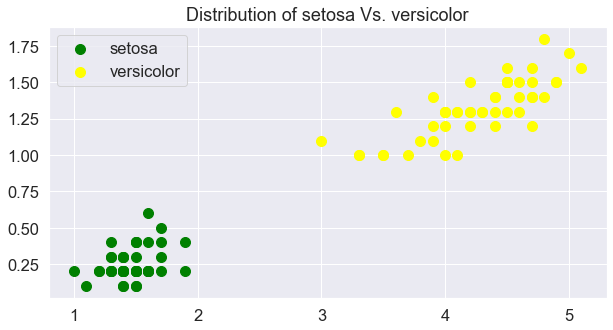

In [98]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.title('Distribution of setosa Vs. versicolor')                                       # plotting 'setosa'& 'versicolor'
# Taking only 'petal length(cm)' & 'petal width(cm)'
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green',s=100,label='setosa') #plotting scatter plot
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='yellow',s=100,label='versicolor')
plt.legend()
plt.show()

In [78]:
x = df.drop(['target','flower_name'],axis=1) # seperating independent & dependent variable.
y = df['target']

In [79]:
from sklearn.model_selection import train_test_split

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) # splitting train & test dataset.

In [85]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [86]:
from sklearn.ensemble import RandomForestClassifier # Importing Random Forest Classifier.

In [89]:
clf = RandomForestClassifier(n_estimators=10) # for n_estimator=10
clf.fit(x_train,y_train) # fitting model.
clf.score(x_test,y_test) # model score.

0.9666666666666667

In [90]:
y_pred = clf.predict(x_test) # predicting x_test

In [93]:
from sklearn.metrics import confusion_matrix # Importing confusion matrix.
cm = confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0, 10,  1],
       [ 0,  0,  9]], dtype=int64)

Text(61.5, 0.5, 'True')

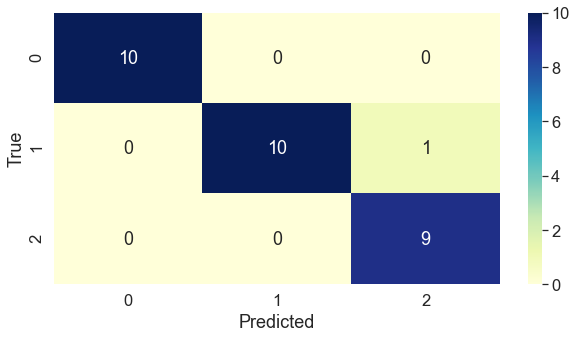

In [96]:
# Plotting heatmap for confusion matrix.
sns.set(font_scale=1.5)
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')